In [ ]:
#Purpose practical Tue 9oct2017
#Numerical Differentiation

In [1]:
import numpy as np

In [2]:
#variables
pa = 1e5 #pascals
pb = 200 #pascals
f = 1e-4 #s^-1
rho = 1 #kg*m^-3
l = 2.4e6 #m
ymin = 0 #m
ymax = 1e6 #m

n = 10

In [3]:
y = np.linspace(ymin, ymax, n)
dy = (ymax-ymin) / (n-1)

In [4]:
p = pa + (pb*np.cos((y*np.pi)/l))

In [5]:
p_prime = np.full((len(y)), np.nan)

In [6]:
#first
p_prime[0] = ((p[1]-p[0]) / dy)

#middle
for i in range(1, len(y)-1):
    p_prime[i] = ((p[i+1]-p[i-1]) / (2*dy))
    
#end
p_prime[-1] = ((p[-1]-p[-2]) / dy)

In [7]:
u = (-1/(rho*f))*p_prime

# solve it analytically


In [8]:
an_p_prime = -((np.pi*pb)/l) * (np.sin((y*np.pi)/l))

In [9]:
an_u = (-1/(rho*f))*an_p_prime

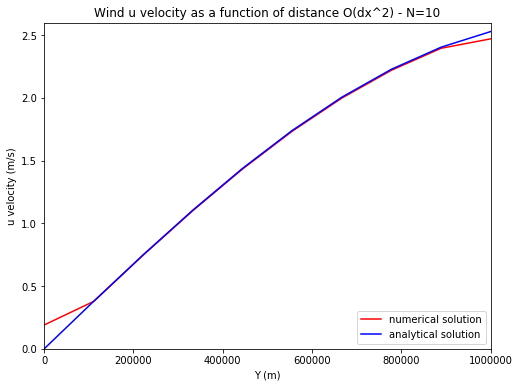

In [57]:

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(num=222, nrows=1, ncols=1, figsize=(8,6))
x_axis = y #(11,)
y_axis = u #(11,)
y_axis2 = an_u
ax1.plot(x_axis, y_axis, 'r', label='numerical solution')
ax1.plot(x_axis, y_axis2, 'b', label='analytical solution')
ax1.set_xlim((0,1e6))
ax1.set_ylim((0, 2.6))
ax1.set_ylabel("u velocity (m/s)")
ax1.set_xlabel("Y (m)")
ax1.set_title('Wind u velocity as a function of distance O(dx^2) - '+'N='+str(n))
legend = ax1.legend(loc='lower right')

            
plt.show()

In [11]:
errors = an_u - u
errors

array([-0.19005051,  0.00133633,  0.00264444,  0.00389671,  0.0050667 ,
        0.00612969,  0.00706324,  0.00784765,  0.00846633,  0.05809492])

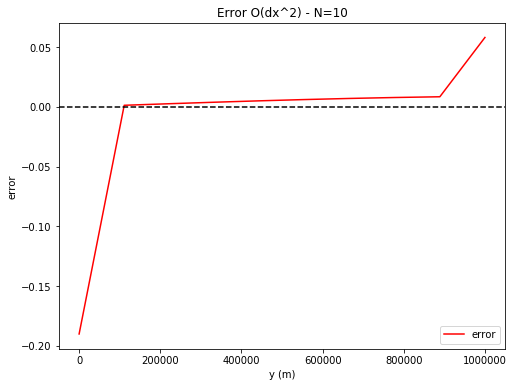

In [58]:
fig, ax1 = plt.subplots(num=223, nrows=1, ncols=1, figsize=(8,6))
x_axis = np.arange(n)
y_axis = errors
# ax1.plot(np.arange(n), errors, 'r')
ax1.plot(y, errors, 'r', label='error')

# ax1.set_xlim((0,int(n-1)))
# ax1.set_ylim((0, 3))
ax1.set_ylabel("error")
ax1.set_xlabel("y (m)")
ax1.set_title('Error O(dx^2) - '+'N='+str(n))
ax1.axhline(y=0, color='k', linestyle='--')
legend = ax1.legend(loc='lower right')
plt.show()

# Does the code behave as expected?

In [83]:
erroraty = 1e5
an_dp1 = ((-np.pi*pb)/l) * (np.sin((erroraty*np.pi)/l)) #analytical dp/dy
deltay_list = [1e5, 5e4]

#create empty nan lists
p1plus = np.full(len(deltay_list), np.nan)
p1minus = np.full(len(deltay_list), np.nan)
errorlist = np.full(len(deltay_list), np.nan)

for deltay in enumerate(deltay_list):
    p1plus[deltay[0]] = pa + (pb*np.cos(((erroraty+deltay[1])*np.pi)/l)) #P(j+1)
    p1minus[deltay[0]] = pa + (pb*np.cos(((erroraty-deltay[1])*np.pi)/l)) #P(j-1)
    errorlist[deltay[0]] = (p1plus[deltay[0]] - p1minus[deltay[0]]) / (2*dy)
    
print(errorlist)

np.log(errorlist[0]/errorlist[1]) / (np.log(deltay_list[0]) - np.log(deltay_list[1]))

[ -3.06667563e-05  -1.53662786e-05]


0.99690776763609279

# 2

In [15]:
p_prime3 = np.full((len(y)), np.nan)

In [16]:
#first
p_prime3[0] = ((p[1]-p[0]) / dy)

#second
p_prime3[1] = (-p[3]+6*p[2]-3*p[1]-2*p[0]) / (6*dy)

#middle
for i in range(2, len(y)-2):
    p_prime3[i] = (-p[i+2]+8*p[i+1]-8*p[i-1]+p[i-2]) / (12*dy)
    
#penultimate
p_prime3[-2] = (2*p[-1]+3*p[-2]-6*p[i-3]+p[i-4]) / (6*dy)
    
#end
p_prime3[-1] = ((p[-1]-p[-2]) / dy)